**Author**: CodeForAll  
**License**: MIT License

--- 


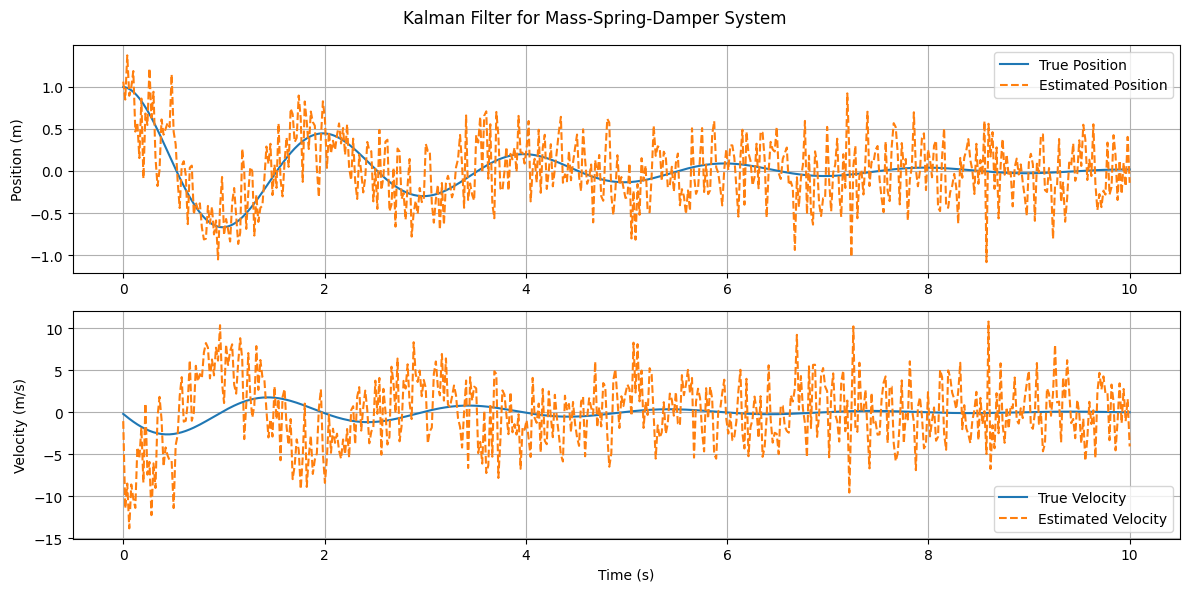

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# System parameters
m = 1.0   # mass (kg)
k = 10.0  # spring constant (N/m)
c = 1.0   # damping coefficient (N·s/m)

# State-space representation
A = np.array([[0, 1],
              [-k/m, -c/m]])
B = np.array([[0],
              [1/m]])
C = np.array([[1, 0]])  # Only position is measured
D = np.array([[0]])

# Kalman filter parameters
Q = np.eye(2) * 0  # No process noise
R = np.array([[0]])  # No measurement noise
P = np.eye(2)          # Initial error covariance

# Time vector and initial condition
T = np.linspace(0, 10, 500)
dt = T[1] - T[0]

# Initial conditions
x = np.array([[1.0],   # true position (initial displacement)
              [0.0]])  # true velocity (at rest)
x_hat = np.array([[0.0],
                  [0.0]])  # initial estimate of state

x_hist = []
x_hat_hist = []

for t in T:
    # Simulate the system dynamics (no control input)
    x_dot = A @ x + B @ np.array([[0]])  # No control input
    x += x_dot * dt

    # Simulate noisy measurements (only position is measured)
    y = C @ x + np.random.normal(0, np.sqrt(R), size=(1, 1))

    # Kalman filter prediction step
    x_hat_minus = A @ x_hat  # Predicted state
    P_minus = A @ P @ A.T + Q  # Predicted error covariance

    # Kalman gain
    K = P_minus @ C.T @ np.linalg.inv(C @ P_minus @ C.T + R)

    # Kalman filter update step
    x_hat = x_hat_minus + K @ (y - C @ x_hat_minus)  # Update estimate
    P = (np.eye(2) - K @ C) @ P_minus  # Update error covariance

    # Store results for plotting
    x_hist.append(x.flatten())
    x_hat_hist.append(x_hat.flatten())

# Convert lists to numpy arrays for plotting
x_hist = np.array(x_hist)
x_hat_hist = np.array(x_hat_hist)

# Plotting results
plt.figure(figsize=(12, 6))

# Position plot
plt.subplot(2, 1, 1)
plt.plot(T, x_hist[:, 0], label="True Position")
plt.plot(T, x_hat_hist[:, 0], '--', label="Estimated Position")
plt.ylabel("Position (m)")
plt.legend()
plt.grid(True)

# Velocity plot
plt.subplot(2, 1, 2)
plt.plot(T, x_hist[:, 1], label="True Velocity")
plt.plot(T, x_hat_hist[:, 1], '--', label="Estimated Velocity")
plt.ylabel("Velocity (m/s)")
plt.xlabel("Time (s)")
plt.legend()
plt.grid(True)

plt.suptitle("Kalman Filter for Mass-Spring-Damper System")
plt.tight_layout()
plt.show()
